In [1]:
import os.path
from imutils import paths, resize
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dense

import pickle

import pandas as pd
from random import choices

from custom import get_letters_list2, normalize_image_size

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
data = []
labels = []
count = 0
for letter_path in paths.list_images('grainy_samples/letters'):
    image = cv2.imread(letter_path,0)
    
    # Resize image
    image = normalize_image_size(image,28,28)

    
    image = np.expand_dims(image, axis = 2)
    data.append(image)
    labels.append(letter_path.split(os.path.sep)[-2])
    count+=1
    if count%2000==0:
        print('Added image #%d'%count)


Added image #2000
Added image #4000
Added image #6000
Added image #8000
Added image #10000
Added image #12000
Added image #14000
Added image #16000
Added image #18000
Added image #20000
Added image #22000
Added image #24000
Added image #26000
Added image #28000
Added image #30000
Added image #32000
Added image #34000
Added image #36000
Added image #38000
Added image #40000
Added image #42000
Added image #44000
Added image #46000
Added image #48000
Added image #50000
Added image #52000
Added image #54000
Added image #56000
Added image #58000
Added image #60000
Added image #62000
Added image #64000
Added image #66000
Added image #68000
Added image #70000
Added image #72000
Added image #74000
Added image #76000
Added image #78000
Added image #80000
Added image #82000
Added image #84000
Added image #86000
Added image #88000
Added image #90000
Added image #92000
Added image #94000


In [5]:
data = np.array(data,dtype='float')/255.0
labels = np.array(labels)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data,labels, test_size=0.25)

In [8]:
lb = LabelBinarizer().fit(y_train)
y_train = lb.transform(y_train)
y_test = lb.transform(y_test)

In [10]:
many_models = []
for i in range(10):
    model = Sequential()
    model.add(Conv2D(20, (5, 5), padding="same", input_shape=(28, 28, 1), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(50, (5, 5), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(500, activation="relu"))
    model.add(Dense(19, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=19, epochs=i+1, verbose=1)
    many_models.append(model)

Train on 71238 samples, validate on 23746 samples
Epoch 1/1
71238/71238 [==============================] - 189s 3ms/step - loss: 0.1506 - acc: 0.9598 - val_loss: 0.0880 - val_acc: 0.9768
Train on 71238 samples, validate on 23746 samples
Epoch 1/2
71238/71238 [==============================] - 208s 3ms/step - loss: 0.1491 - acc: 0.9609 - val_loss: 0.0762 - val_acc: 0.9806
Epoch 2/2
71238/71238 [==============================] - 212s 3ms/step - loss: 0.0464 - acc: 0.9878 - val_loss: 0.0534 - val_acc: 0.9869
Train on 71238 samples, validate on 23746 samples
Epoch 1/3
71238/71238 [==============================] - 203s 3ms/step - loss: 0.1459 - acc: 0.9620 - val_loss: 0.0724 - val_acc: 0.9822
Epoch 2/3
71238/71238 [==============================] - 198s 3ms/step - loss: 0.0441 - acc: 0.9885 - val_loss: 0.0531 - val_acc: 0.9888
Epoch 3/3
71238/71238 [==============================] - 205s 3ms/step - loss: 0.0277 - acc: 0.9923 - val_loss: 0.0954 - val_acc: 0.9803
Train on 71238 samples, vali

In [12]:
for epoch_num in range(10):
    many_models[epoch_num].save('models/many_epochs/epoch_%d.h5'%(epoch_num+1))

In [140]:
with open('models/many_epochs/model_label_map.dat','wb') as f:
    pickle.dump(lb,f)

# Test models to compare epochs

In [23]:
test_list = os.listdir('grainy_samples/_10samples')
passwords_list = []
for model in many_models:
    for test_path in test_list:
        letters_list = get_letters_list2('grainy_samples/_10samples/%s'%test_path)
        attempted_password = ''
        for letter_image in letters_list:
            letter_image = normalize_image_size(letter_image,28,28)
    #         cv2.imshow('letter',letter_image)
    #         cv2.waitKey(0)
    #         cv2.destroyAllWindows()
            letter_image = np.expand_dims(letter_image,axis=2)
            letter_image = np.expand_dims(letter_image,axis=0)
            prediction = model.predict(letter_image)
            attempted_password += lb.inverse_transform(prediction)[0]
        passwords_list.append(attempted_password)

In [37]:
filtered_answers = [a.split('.')[0] for a in test_list]
df = pd.DataFrame({'True Answer:':filtered_answers})
for i in range(10):
    df['Epoch=%d'%(i+1)] = passwords_list[10*i:10*(i+1)]

In [38]:
df

,True Answer:,Epoch=1,Epoch=2,Epoch=3,Epoch=4,Epoch=5,Epoch=6,Epoch=7,Epoch=8,Epoch=9,Epoch=10
0,aqnqvy,aqnquy,zqnquy,aqnqvy,oqndvy,zqnqvy,aqnqny,aqnvvy,aqnqvy,aqnqvy,aqnqvy
1,axwvgn,axwvgn,zxwvgn,nxwugn,azwvgn,aznvgn,axwvgn,axwugn,axwugn,axuugn,axwvgn
2,dkxuyg,dkxuyg,dkxuyg,dkxuhg,dkxuyg,dkxuyg,dkxuys,dkxuyu,dkxuyv,dkxuyo,dkxuyv
3,ebcwuw,ehcwuw,ebcwuw,cbcwus,chcwuv,ebcwuu,ebcpuw,ehcwun,ebcwuw,obcwuw,ebcyuz
4,eybvyx,eykvyx,eybvyx,eybvhx,eycvyx,eybvyc,zybayx,aybvyx,eybvyx,oybvyx,eybvyx
5,gzdudp,szdudp,gzdudp,gpdudp,gududp,gzdudp,szdusz,gzdudp,gzdudp,gzdudp,gzdudp
6,nqaxdk,nqsxdk,nqsxdk,nqsxdk,nqvxdk,nqaxdk,nqqxdk,nqaxdk,nqdxdk,nqoxdk,nqsxdk
7,ppykyz,ppyknz,ppykyz,ppykyz,ppykdu,ppykdz,ppycxz,ppykyz,ppykyz,ppyknz,ppykyz
8,uwqpaa,unqpaa,nwqpzz,nhqpsa,nvqpaz,udqpza,scqpze,nwqpza,ncqpas,uxqpaa,uwqpaa
9,xkyznc,xkyznc,xkyznc,xkyznc,zkyznc,xkyznc,xkyznz,xkyznc,xkyznc,xkyznc,xcyznc


In [43]:
num_errors = []
num_errors.append(0)
for i in range(10):
    errors = 0
    for j in range(10):
        attempt = df['Epoch=%d'%(i+1)][j]
        answer = df['True Answer:'][j]
        errors += sum([attempt[a]!=answer[a] for a in range(6)])
    num_errors.append(errors)
    
    

In [46]:
df.loc[10] = num_errors

In [47]:
df

,True Answer:,Epoch=1,Epoch=2,Epoch=3,Epoch=4,Epoch=5,Epoch=6,Epoch=7,Epoch=8,Epoch=9,Epoch=10
0,aqnqvy,aqnquy,zqnquy,aqnqvy,oqndvy,zqnqvy,aqnqny,aqnvvy,aqnqvy,aqnqvy,aqnqvy
1,axwvgn,axwvgn,zxwvgn,nxwugn,azwvgn,aznvgn,axwvgn,axwugn,axwugn,axuugn,axwvgn
2,dkxuyg,dkxuyg,dkxuyg,dkxuhg,dkxuyg,dkxuyg,dkxuys,dkxuyu,dkxuyv,dkxuyo,dkxuyv
3,ebcwuw,ehcwuw,ebcwuw,cbcwus,chcwuv,ebcwuu,ebcpuw,ehcwun,ebcwuw,obcwuw,ebcyuz
4,eybvyx,eykvyx,eybvyx,eybvhx,eycvyx,eybvyc,zybayx,aybvyx,eybvyx,oybvyx,eybvyx
5,gzdudp,szdudp,gzdudp,gpdudp,gududp,gzdudp,szdusz,gzdudp,gzdudp,gzdudp,gzdudp
6,nqaxdk,nqsxdk,nqsxdk,nqsxdk,nqvxdk,nqaxdk,nqqxdk,nqaxdk,nqdxdk,nqoxdk,nqsxdk
7,ppykyz,ppyknz,ppykyz,ppykyz,ppykdu,ppykdz,ppycxz,ppykyz,ppykyz,ppyknz,ppykyz
8,uwqpaa,unqpaa,nwqpzz,nhqpsa,nvqpaz,udqpza,scqpze,nwqpza,ncqpas,uxqpaa,uwqpaa
9,xkyznc,xkyznc,xkyznc,xkyznc,zkyznc,xkyznc,xkyznz,xkyznc,xkyznc,xkyznc,xcyznc


In [4]:
test_list_full = os.listdir('grainy_samples/samples')
errors_matrix = []
for i in range(100):
    test_list = choices(test_list_full,k=10)
    passwords_list = []
    for model in many_models:
        for test_path in test_list:
            letters_list = get_letters_list2('grainy_samples/samples/%s'%test_path)
            if(type(letters_list[0])==str):
                break
            attempted_password = ''
            for letter_image in letters_list:
                letter_image = normalize_image_size(letter_image,28,28)
        #         cv2.imshow('letter',letter_image)
        #         cv2.waitKey(0)
        #         cv2.destroyAllWindows()
                letter_image = np.expand_dims(letter_image,axis=2)
                letter_image = np.expand_dims(letter_image,axis=0)
                prediction = model.predict(letter_image)
                attempted_password += lb.inverse_transform(prediction)[0]
            passwords_list.append(attempted_password)
    filtered_answers = [a.split('.')[0] for a in test_list]
#     print(len(passwords_list))
    if (len(passwords_list)/10)==len(filtered_answers):
        for j in range(10):
            for k in range(10):
                errors_per_model = sum([passwords_list[10*j:10*(j+1)][k][a]!=filtered_answers[k][a] for a in range(6)])
                errors_matrix.append(errors_per_model)
    print('Completed run #%d'%(i+1))
#     print(errors_per_model)

Completed run #1
Completed run #2
Completed run #3
Completed run #4
Completed run #5
Completed run #6
Completed run #7
Completed run #8
Completed run #9
Completed run #10
Completed run #11
Completed run #12
Completed run #13
Completed run #14
Completed run #15
Completed run #16
Completed run #17
Completed run #18
Completed run #19
Completed run #20
Completed run #21
Completed run #22
Completed run #23
Completed run #24
Completed run #25
Completed run #26
Completed run #27
Completed run #28
Completed run #29
Completed run #30
Completed run #31
Completed run #32
Completed run #33
Completed run #34
Completed run #35
Completed run #36
Completed run #37
Completed run #38
Completed run #39
Completed run #40
Completed run #41
Completed run #42
Completed run #43
Completed run #44
Completed run #45
Completed run #46
Completed run #47
Completed run #48
Completed run #49
Completed run #50
Completed run #51
Completed run #52
Completed run #53
Completed run #54
Completed run #55
Completed run #56
C

In [5]:
epoch1 = []
epoch2 = []
epoch3 = []
epoch4 = []
epoch5 = []
epoch6 = []
epoch7 = []
epoch8 = []
epoch9 = []
epoch10 = []

for i in range(int(len(errors_matrix)/100)):
    for j in range(10):
        epoch1.append(errors_matrix[i*100+j])
        epoch2.append(errors_matrix[i*100+20+j])
        epoch3.append(errors_matrix[i*100+30+j])
        epoch4.append(errors_matrix[i*100+40+j])
        epoch5.append(errors_matrix[i*100+50+j])
        epoch6.append(errors_matrix[i*100+60+j])
        epoch7.append(errors_matrix[i*100+70+j])
        epoch8.append(errors_matrix[i*100+80+j])
        epoch9.append(errors_matrix[i*100+90+j])
        epoch10.append(errors_matrix[i*100+10+j])
    
        

In [6]:
many_df = pd.DataFrame({'Epoch=1':epoch1,'Epoch=2':epoch2,'Epoch=3':epoch3,'Epoch=4':epoch4,'Epoch=5':epoch5,'Epoch=6':epoch6,'Epoch=7':epoch7,'Epoch=8':epoch8,'Epoch=9':epoch9,'Epoch=10':epoch10,})

In [7]:
many_df

,Epoch=1,Epoch=10,Epoch=2,Epoch=3,Epoch=4,Epoch=5,Epoch=6,Epoch=7,Epoch=8,Epoch=9
0,2,1,2,2,1,0,5,2,1,0
1,0,0,0,1,0,1,2,0,1,0
2,1,1,2,3,1,1,3,2,1,1
3,0,3,1,2,2,0,4,2,1,2
4,0,0,2,1,1,1,2,2,0,0
5,1,0,1,2,1,1,2,3,1,1
6,2,0,2,2,1,0,1,1,1,2
7,0,0,0,1,1,0,0,0,0,0
8,0,1,0,1,2,0,1,0,1,0
9,1,0,1,3,3,0,1,2,1,0


In [8]:
error_sums = [sum(epoch1),sum(epoch2),sum(epoch3),sum(epoch4),sum(epoch5),sum(epoch6),sum(epoch7),sum(epoch8),sum(epoch9),sum(epoch10)]

In [9]:
error_sums

[597, 587, 1488, 935, 651, 1630, 930, 794, 780, 497]

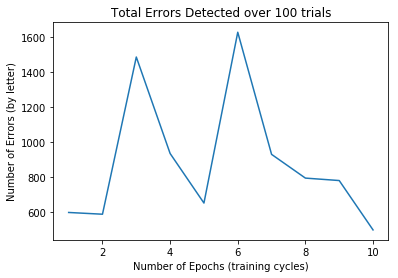

In [10]:
x = [1,2,3,4,5,6,7,8,9,10]
plt.plot(x,error_sums)
plt.title('Total Errors Detected over 100 trials')
plt.xlabel('Number of Epochs (training cycles)')
plt.ylabel('Number of Errors (by letter)')
plt.show()

In [2]:
many_models = []
model_dir = os.listdir('models/many_epochs')
model_dir = model_dir[0:-1]
model_dir

['epoch_1.h5',
 'epoch_10.h5',
 'epoch_2.h5',
 'epoch_3.h5',
 'epoch_4.h5',
 'epoch_5.h5',
 'epoch_6.h5',
 'epoch_7.h5',
 'epoch_8.h5',
 'epoch_9.h5']

In [3]:
from keras.models import load_model
for mod in model_dir:
    many_models.append(load_model('models/many_epochs/%s'%mod))
    
with open('models/many_epochs/model_label_map.dat','rb') as f:
    lb = pickle.load(f)